# ResNet-50, short for Residual Networks is a convolutional neural network that is 50 layers deep. One can load a pretrained version of the network trained on more than a million images from the ImageNet database. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. As a result, the network has learned rich feature representations for a wide range of images. The network has an image input size of 224-by-224.

## ResNet first introduced the concept of Skip connection. There are two reasons why Skip connections work here:
1. They mitigate the problem of vanishing gradient by allowing this alternate shortcut path for gradient to flow through
2. They allow the model to learn an identity function which ensures that the higher layer will perform at least as good as the lower layer, and not worse

There are many variants of ResNet architecture i.e. same concept but with a different number of layers. We have ResNet-18, ResNet-34, ResNet-50, ResNet-101, ResNet-110, ResNet-152, ResNet-164, ResNet-1202 etc.

In this notebook, we will try to implement the concept of Transfer Learning i.e. we will use this pre-trained model to predict and classify a number of images of horses and humans. The major advantages of Transfer Learning is that needs lesser training data and training time.

In [1]:
# First we import the necessary libraries
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Using ImageDataGenerator for our training and testing images

gen= ImageDataGenerator(rescale=1./255)

traindata= gen.flow_from_directory(r"C:\Users\user\Downloads\Horses vs Humans\train", target_size=(224,224))
testdata= gen.flow_from_directory(r"C:\Users\user\Downloads\Horses vs Humans\test", target_size=(224,224))

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


Displaying a few images :

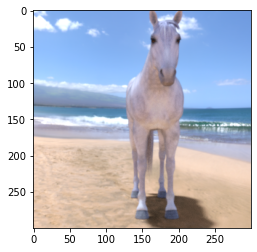

In [3]:
from tensorflow.keras.preprocessing import image
image1 = image.load_img(r'C:\Users\user\Downloads\Horses vs Humans\train\horses\horse28-0.png')
plt.imshow(image1)

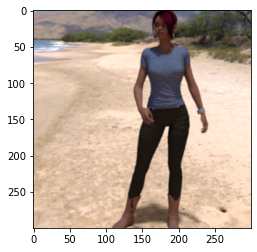

In [4]:
image2 = image.load_img(r'C:\Users\user\Downloads\Horses vs Humans\train\humans\human08-18.png')
plt.imshow(image2)

In [5]:
# importing the pre trained model - Resnet50
from tensorflow.keras.applications import ResNet50

In [6]:
# making an instance of Resnet50 model
# include_top= False means that we are excluding the fully connected layers at the end which will modified as per the problem
resnet = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet", pooling='max')

In [7]:
# we do not wish train the Resnet50 model
resnet.trainable=False

In [8]:
# output layer has 2 nodes for binary classification
base_model= Sequential([resnet,
                  Flatten(),
                  Dense(units=256, activation='relu'),
                  Dense(units=256, activation='relu'),
                  Dense(units=2, activation='softmax'),
                  ])

In [26]:
base_model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
Total params: 24,178,562
Trainable params: 590,850
Non-trainable params: 23,587,712
_________________________________________________________________


In [28]:
resnet_history = base_model.fit_generator(generator= traindata, validation_data= testdata, epochs=5)

Epoch 1/5
33/33 [==============================] - 125s 4s/step - loss: 1.7611 - accuracy: 0.5131 - val_loss: 1.1841 - val_accuracy: 0.5039
Epoch 2/5
33/33 [==============================] - 121s 4s/step - loss: 0.7081 - accuracy: 0.6066 - val_loss: 0.7131 - val_accuracy: 0.6367
Epoch 3/5
33/33 [==============================] - 128s 4s/step - loss: 0.6326 - accuracy: 0.6796 - val_loss: 0.4717 - val_accuracy: 0.7891
Epoch 4/5
33/33 [==============================] - 119s 4s/step - loss: 0.5856 - accuracy: 0.6796 - val_loss: 1.1784 - val_accuracy: 0.6289
Epoch 5/5
33/33 [==============================] - 105s 3s/step - loss: 0.5173 - accuracy: 0.7566 - val_loss: 0.6537 - val_accuracy: 0.7969


So we see that the training accuracy is 83% and the testing accuracy is 80%

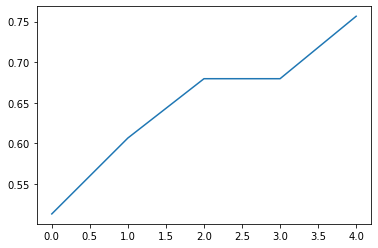

In [29]:
plt.plot(resnet_history.history["accuracy"])

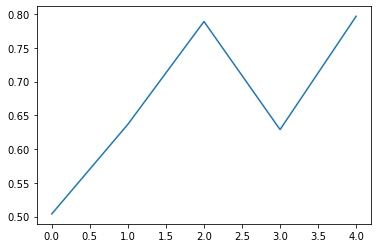

In [30]:
plt.plot(resnet_history.history["val_accuracy"])

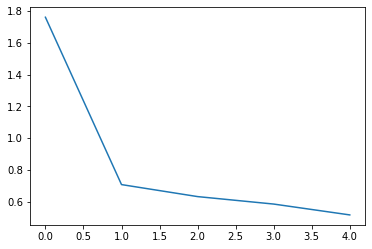

In [31]:
plt.plot(resnet_history.history["loss"])

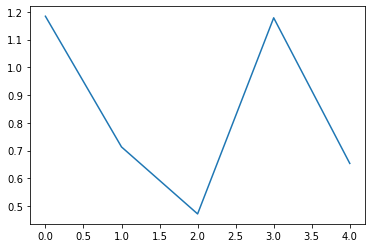

In [32]:
plt.plot(resnet_history.history["val_loss"])

# Testing

In [33]:
from tensorflow.keras.preprocessing import image
classes= ["horse","human"]

(224, 224, 3)


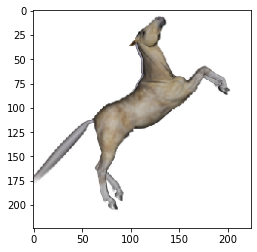

In [34]:
img1= image.load_img(r"C:\Users\user\Downloads\Horses vs Humans\test\horses\horse4-102.png",target_size=(224,224))
img1=np.asarray(img1)
plt.imshow(img1)
print(img1.shape)

In [35]:
img1= np.expand_dims(img1,axis=0)
print(img1.shape)

(1, 224, 224, 3)


In [36]:
pred1= base_model.predict(img1)
print(pred1)
print("Result: ",classes[np.argmax(pred1)])

[[1.0000000e+00 4.9576427e-09]]
Result:  horse


(224, 224, 3)


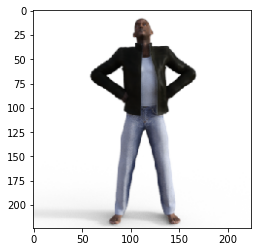

In [37]:
img2= image.load_img(r"C:\Users\user\Downloads\Horses vs Humans\test\humans\valhuman03-05.png",target_size=(224,224))
img2= np.asarray(img2)
plt.imshow(img2)
print(img2.shape)

In [38]:
img2= np.expand_dims(img2,axis=0)
print(img2.shape)

(1, 224, 224, 3)


In [39]:
pred2= base_model.predict(img2)
print(pred2)
print("Result: ",classes[np.argmax(pred2)])

[[9.9998832e-01 1.1721987e-05]]
Result:  horse


# We can see that the results are a little biased towards images of horses